# Lab 7: Linear Discriminant Analysis (LDA)

 <h2 style="text-align: center;">Name: Neelanajn Dutta </h2>

 <h2 style="text-align: center;">Registration number: 2448040 </h2>

## Importing libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.covariance import EmpiricalCovariance
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Loading the dataset:

In [2]:
cancer = load_breast_cancer()
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head()  # Display first 5 rows

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
print("No. of Records/Rows:",df.shape[0])
print("No. of Features/Columns:", df.shape[1]) 
print('Features:', df.columns)

No. of Records/Rows: 569
No. of Features/Columns: 31
Features: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


In [4]:
df.info()  # Data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df['target'].value_counts()  # Class distribution

target
1    357
0    212
Name: count, dtype: int64

In [6]:
# Checking for missing values in the dataset
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [7]:
 #  1. Summary Statistics
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


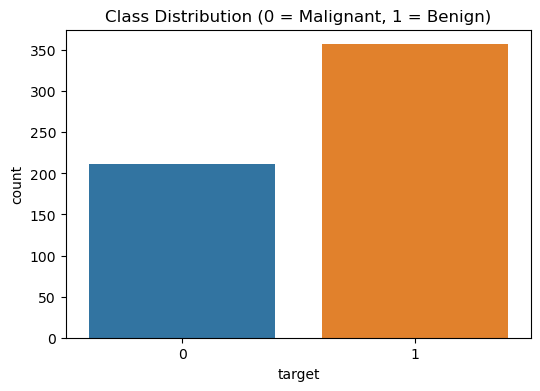

In [8]:
# 2. Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df['target'])
plt.title("Class Distribution (0 = Malignant, 1 = Benign)")
plt.show()

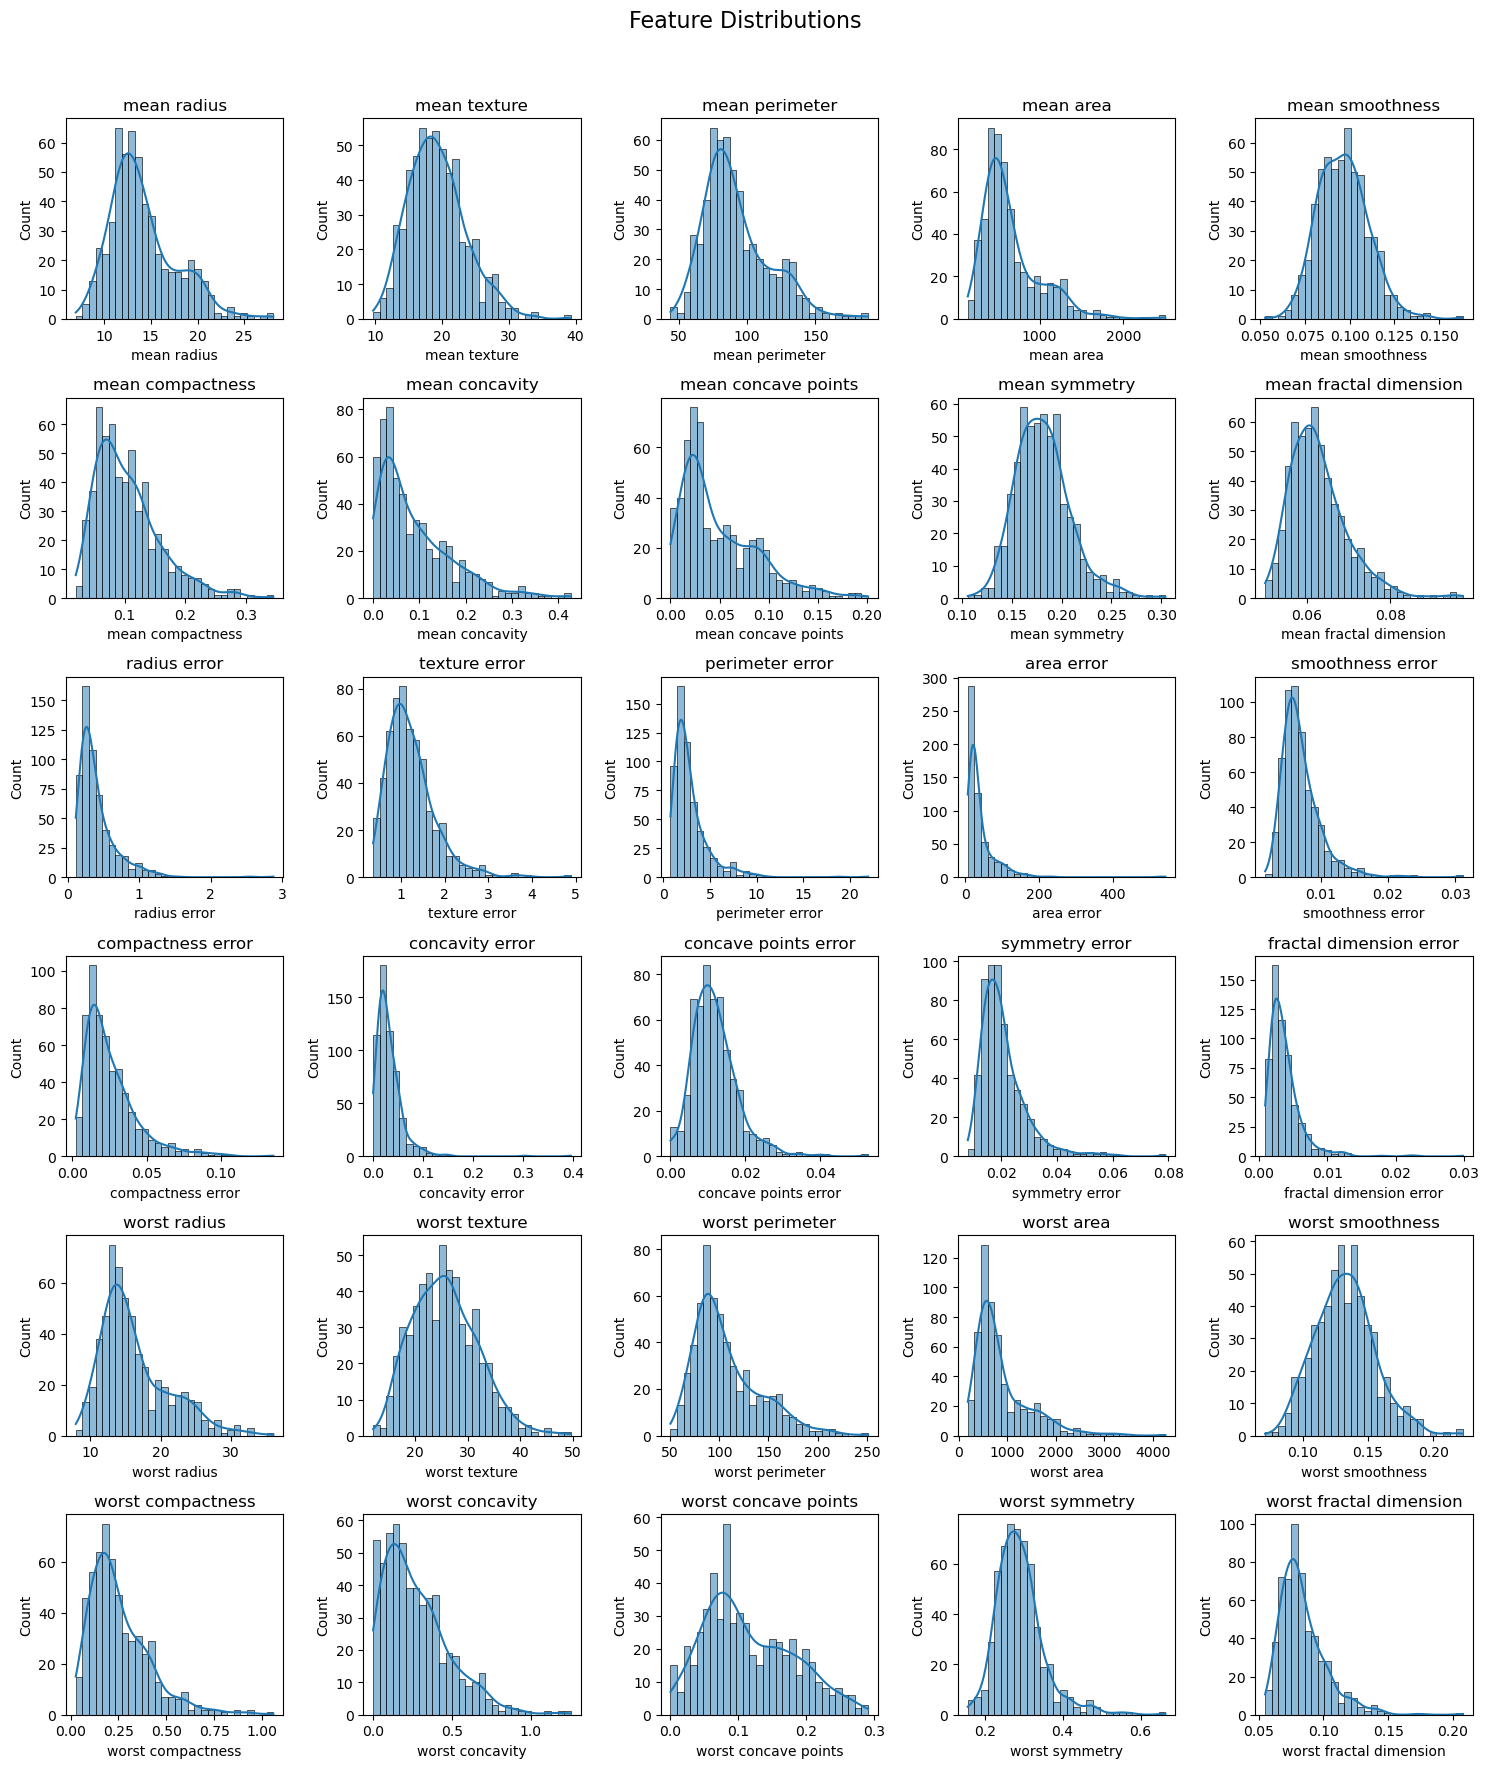

In [9]:
# 3. Feature Distributions
# Select features for visualization (Excluding target)
features =df.columns[:-1]  
num_features = len(features)
# Setting grid size
rows = 6 # Number of rows in the grid
cols = 5 # Number of columns in the grid
fig, axes = plt.subplots(rows, cols, figsize=(15,18))
fig.suptitle("Feature Distributions", fontsize=16)
# Plot each feature in the grid
for i, col in enumerate(features):
    r,c = divmod(i,cols) #Get row and column index
    sns.histplot(df[col],kde=True,bins=30,ax=axes[r,c])
    axes[r,c].set_title(col)
plt.tight_layout(rect=[0,0,1,0.96]) #Adjusting layout
plt.show()

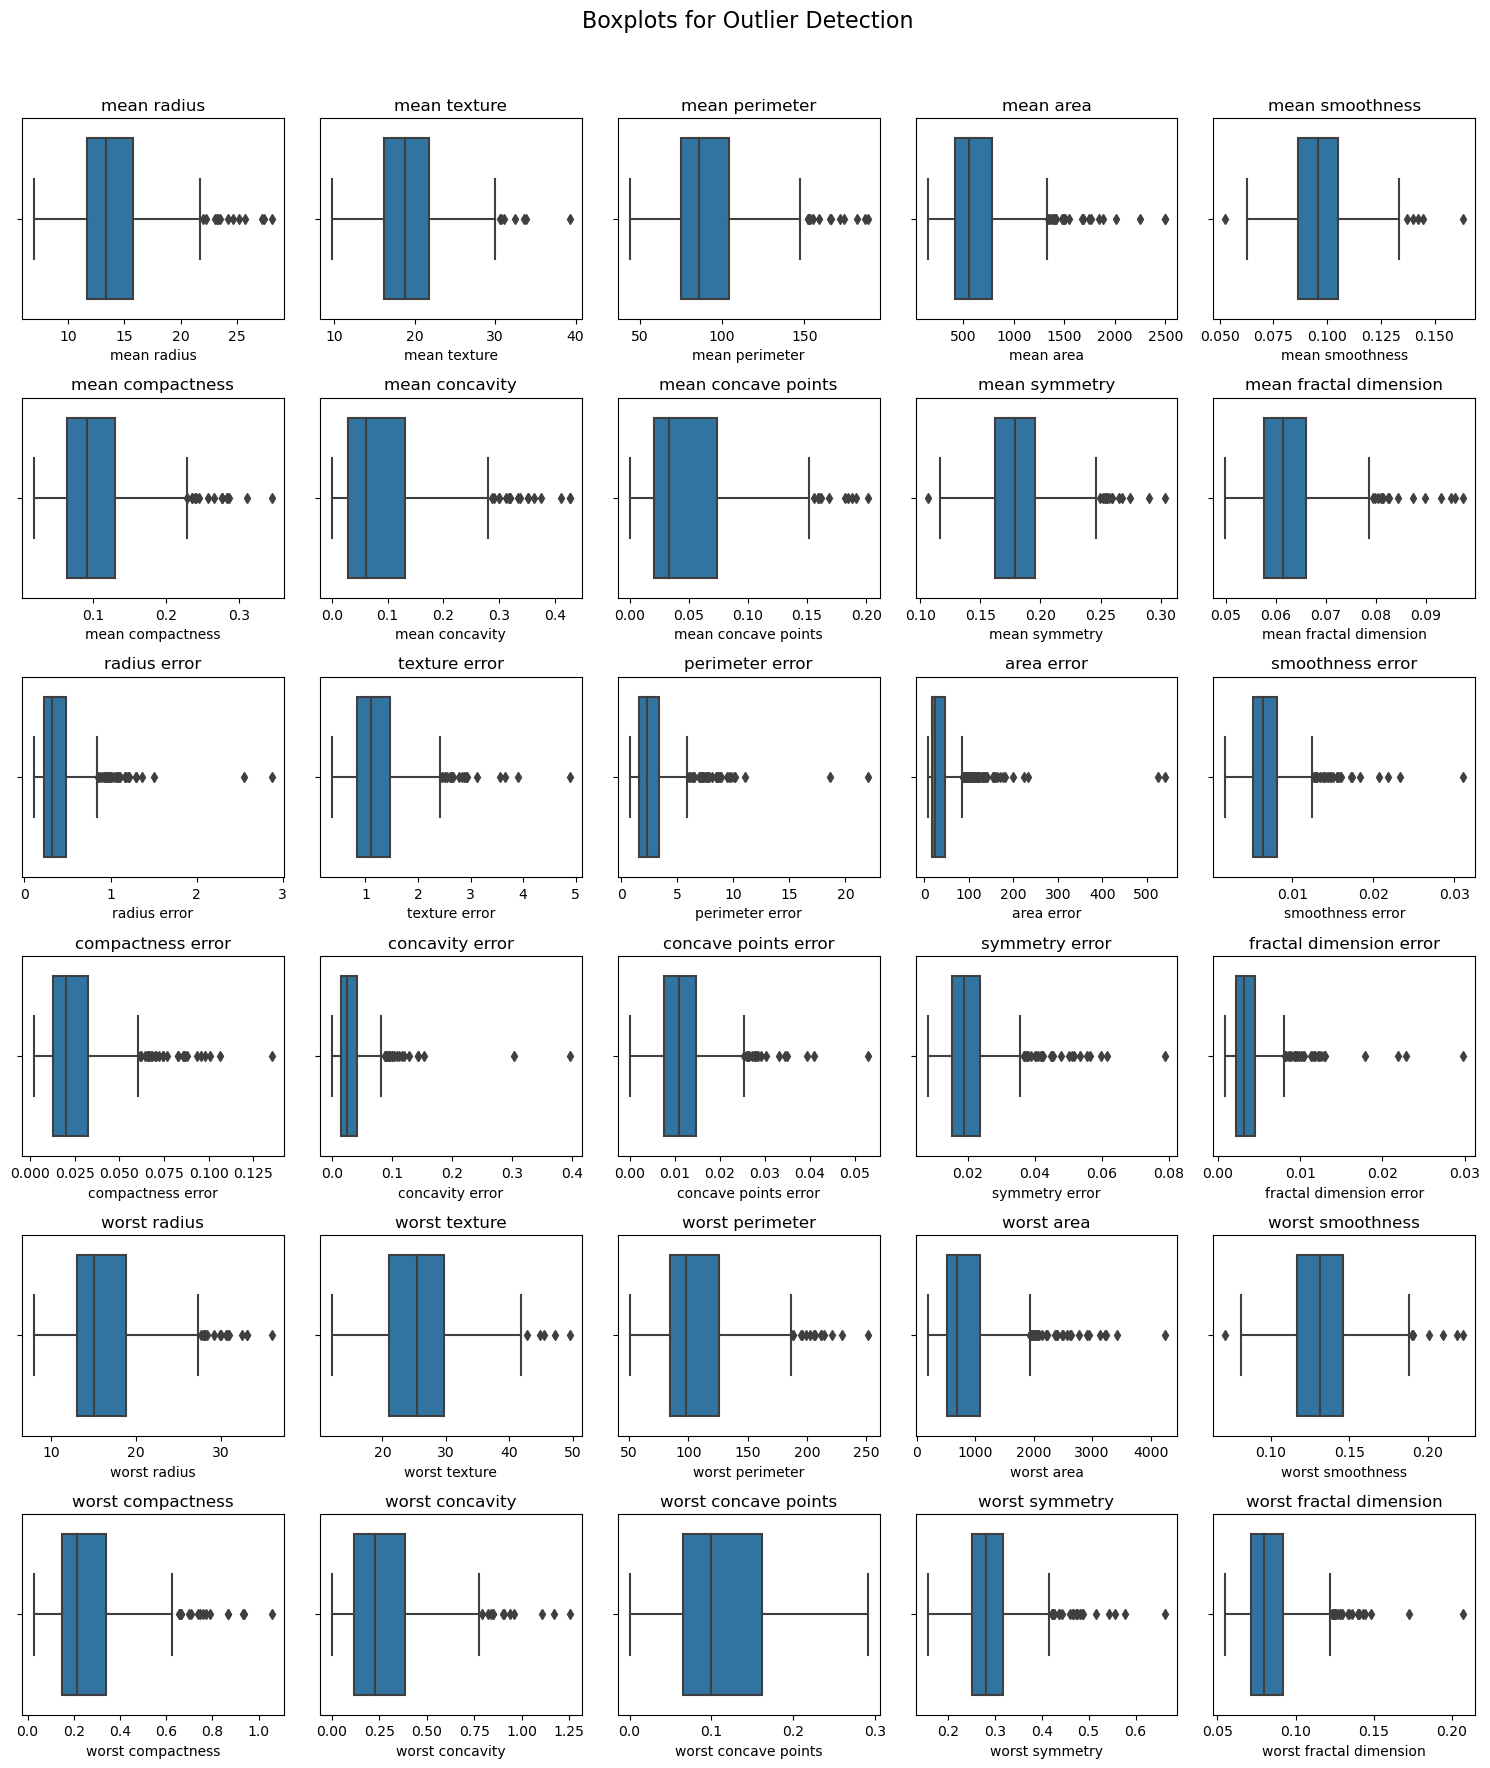

In [10]:
# 4. Boxplots to Check Outliers
# Select features only (Exclude target)
features = df.columns[:-1]
num_features = len(features)
# Select features only (Exclude target)
features = df.columns[:-1]
num_features = len(features)

# Set grid size
rows = 6  # Number of rows in grid
cols = 5  # Number of columns in grid
fig, axes = plt.subplots(rows, cols, figsize=(15, 18))
fig.suptitle("Boxplots for Outlier Detection", fontsize=16)

# Plot boxplots in grid
for i, col in enumerate(features):
    r, c = divmod(i, cols)  # Get row and column index
    sns.boxplot(x=df[col], ax=axes[r, c])
    axes[r, c].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()

In [11]:
# Outlier Removal Using IQR Method
Q1 = df[features].quantile(0.25)  # First quartile (25th percentile)
Q3 = df[features].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df_cleaned = df[~((df[features] < lower_bound) | (df[features] > upper_bound)).any(axis=1)]

# Print before and after shape
print(f"Original dataset shape: {df.shape}")
print(f"Dataset shape after outlier removal: {df_cleaned.shape}")

Original dataset shape: (569, 31)
Dataset shape after outlier removal: (398, 31)


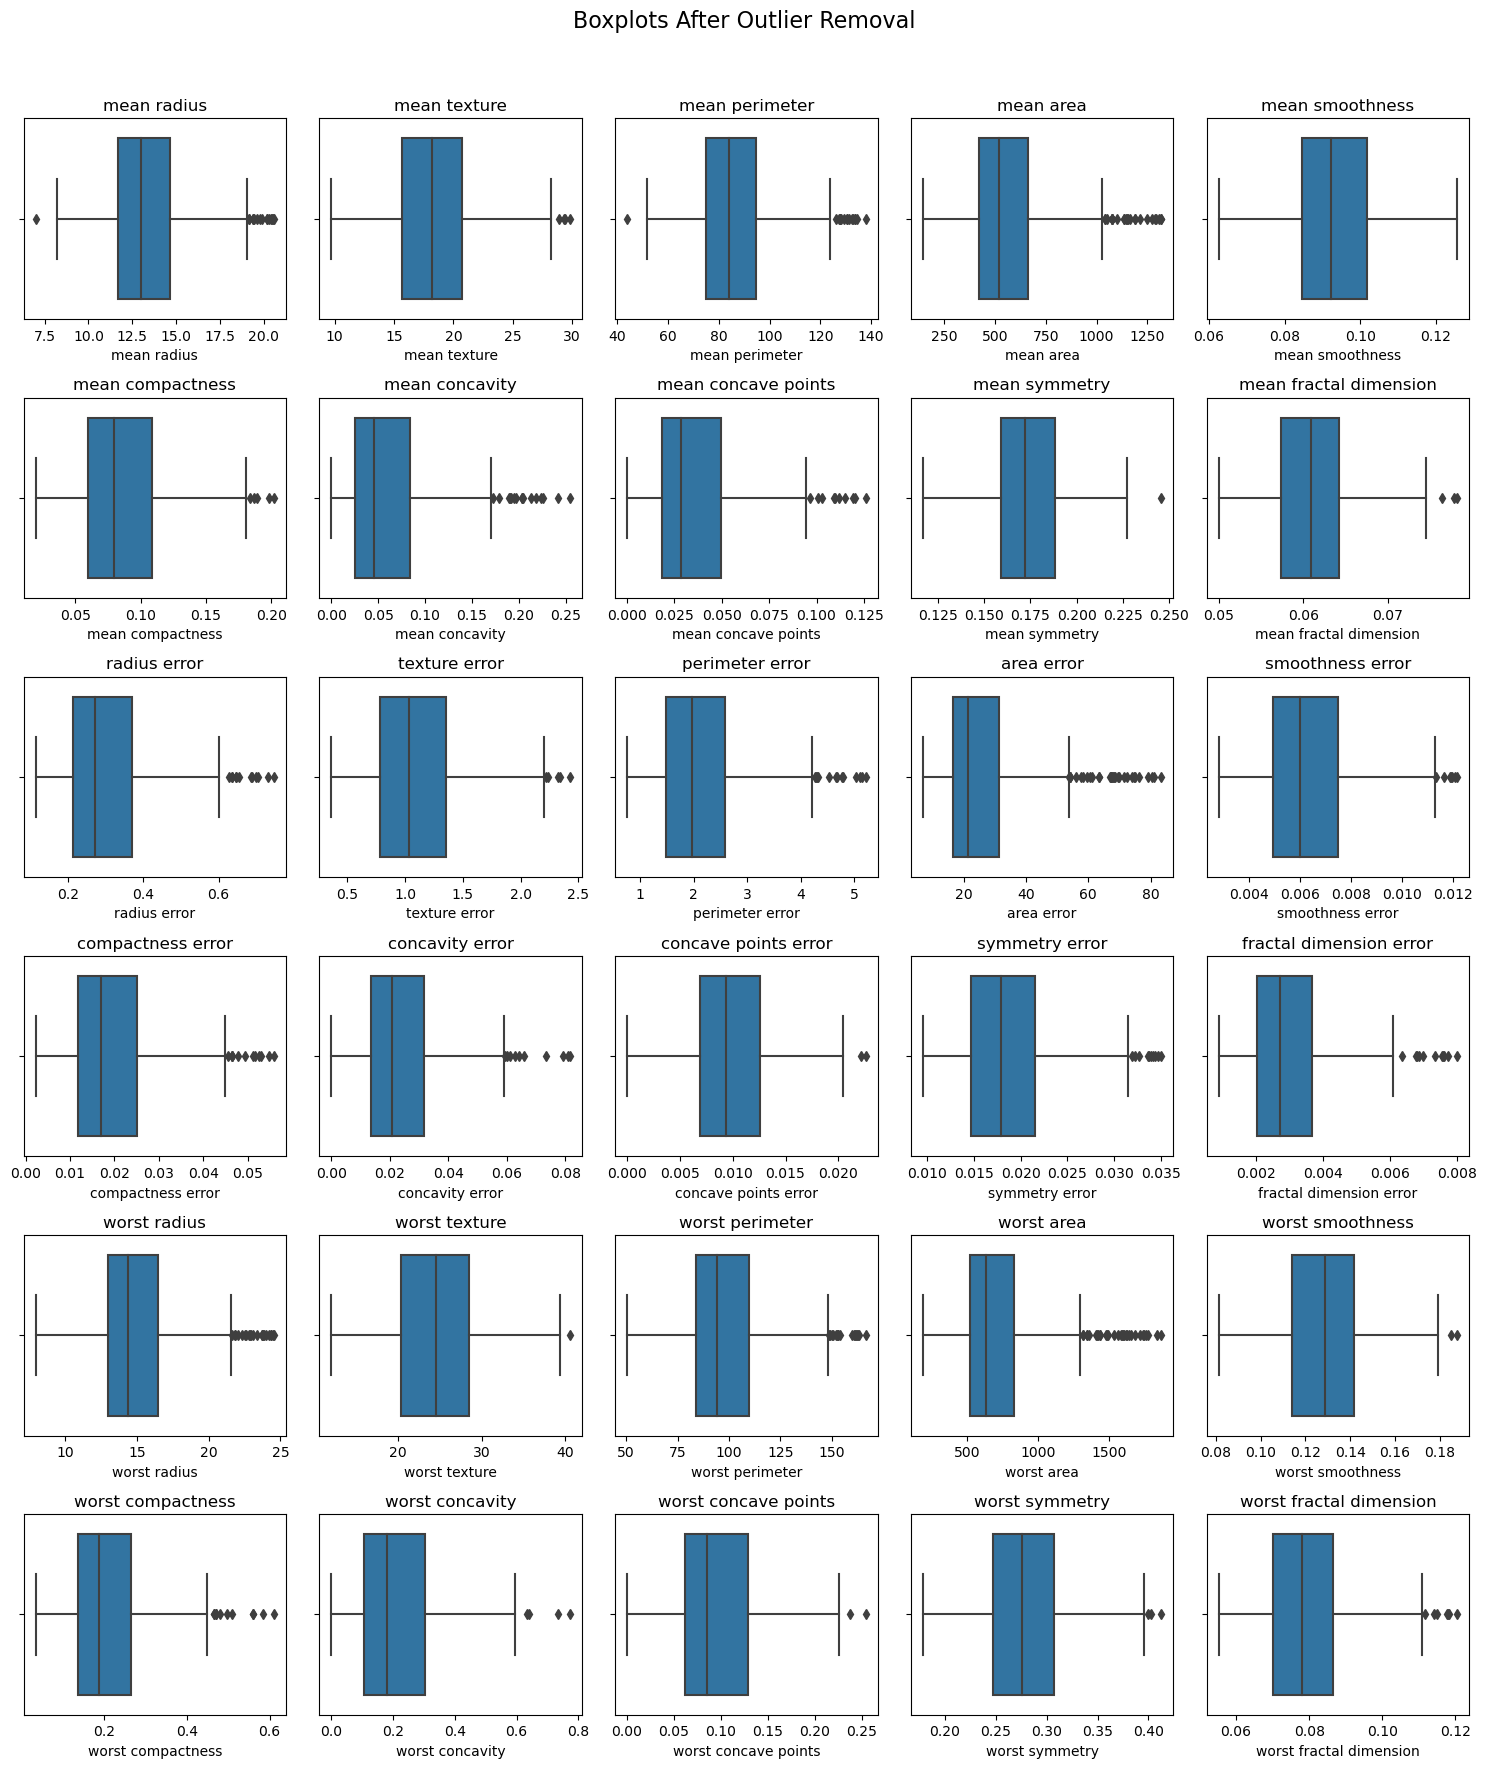

In [12]:
# Boxplots after Outlier Removal
features = df_cleaned.columns[:-1]  # Exclude target column
num_features = len(features)

# Set grid size
rows = 6  # Number of rows in grid
cols = 5  # Number of columns in grid
fig, axes = plt.subplots(rows, cols, figsize=(15, 18))
fig.suptitle("Boxplots After Outlier Removal", fontsize=16)

# Plot boxplots in grid
for i, col in enumerate(features):
    r, c = divmod(i, cols)  # Get row and column index
    sns.boxplot(x=df_cleaned[col], ax=axes[r, c])
    axes[r, c].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
plt.show()

In [13]:
# Feature Selection (RFE)

# Separate features and target
X = df_cleaned.drop(columns=['target'])
y = df_cleaned['target']

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

# Standardize Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Logistic Regression with More Iterations
model = LogisticRegression(max_iter=500, solver='lbfgs')

# Find the best number of features
best_score = 0
best_num_features = 0
best_features = None

for num_features in range(2, X.shape[1] + 1, 2):  # Test feature sets from 5 to max, step 5
    rfe = RFE(estimator=model, n_features_to_select=num_features)
    X_rfe = rfe.fit_transform(X_scaled, y)
    
    # Evaluate with cross-validation
    score = np.mean(cross_val_score(model, X_rfe, y, cv=5, scoring='accuracy'))
    
    print(f"Features: {num_features}, Accuracy: {score:.4f}")  # Track performance
    
    if score > best_score:  # Update best selection
        best_score = score
        best_num_features = num_features
        best_features = X.columns[rfe.support_]

print(f"\nBest Number of Features: {best_num_features} with Accuracy: {best_score:.4f}")
print("Selected Features:\n", best_features)


Features: 2, Accuracy: 0.9447
Features: 4, Accuracy: 0.9623
Features: 6, Accuracy: 0.9648
Features: 8, Accuracy: 0.9698
Features: 10, Accuracy: 0.9749
Features: 12, Accuracy: 0.9724
Features: 14, Accuracy: 0.9724
Features: 16, Accuracy: 0.9774
Features: 18, Accuracy: 0.9724
Features: 20, Accuracy: 0.9724
Features: 22, Accuracy: 0.9724
Features: 24, Accuracy: 0.9698
Features: 26, Accuracy: 0.9698
Features: 28, Accuracy: 0.9698
Features: 30, Accuracy: 0.9698

Best Number of Features: 16 with Accuracy: 0.9774
Selected Features:
 Index(['mean texture', 'mean compactness', 'mean concavity',
       'mean concave points', 'radius error', 'area error',
       'compactness error', 'fractal dimension error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst concavity', 'worst concave points', 'worst fractal dimension'],
      dtype='object')


In [15]:
# Create new dataset with selected features
df_selected = df_cleaned[best_features].copy()  # Using df_cleaned (after outlier removal)
df_selected['target'] = df_cleaned['target']  # Add target column back

# Display the shape and save it
print("Final Dataset Shape:", df_selected.shape)

Final Dataset Shape: (398, 17)


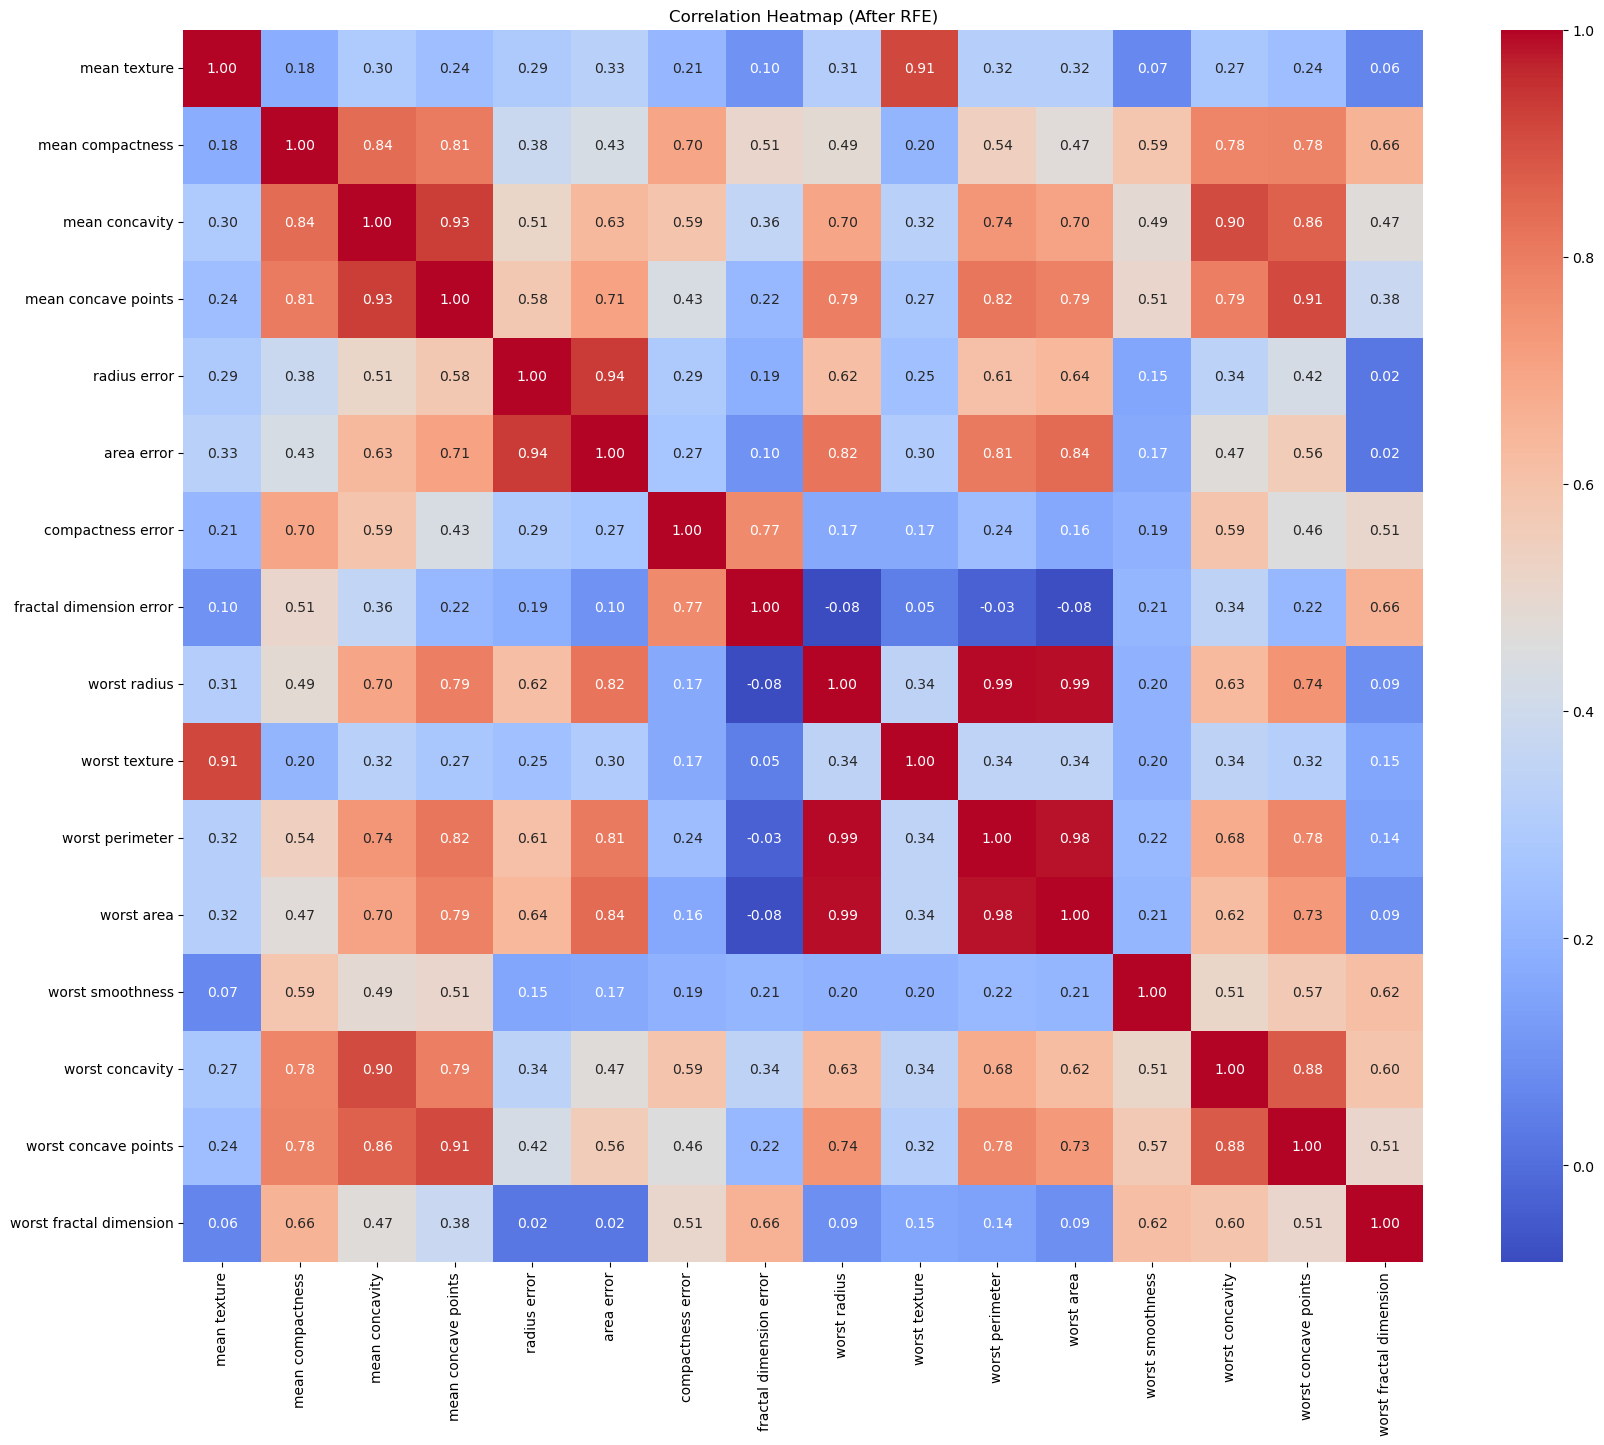

In [16]:
# Check correlation among selected features
plt.figure(figsize=(20,16))
sns.heatmap(df_selected.iloc[:, :-1].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (After RFE)")
plt.show()


In [17]:
# Compute correlation matrix
corr_matrix = df_selected.iloc[:, :-1].corr().abs()  # Exclude target column

# Find feature pairs with correlation > 0.95
high_corr_pairs = np.where(corr_matrix > 0.95)
high_corr_pairs = [(corr_matrix.index[i], corr_matrix.columns[j]) 
                   for i, j in zip(*high_corr_pairs) if i != j]

# Print the highly correlated feature pairs
print("Highly Correlated Feature Pairs (> 0.95):")
for f1, f2 in high_corr_pairs:
    print(f"{f1} ↔ {f2}")

Highly Correlated Feature Pairs (> 0.95):
worst radius ↔ worst perimeter
worst radius ↔ worst area
worst perimeter ↔ worst radius
worst perimeter ↔ worst area
worst area ↔ worst radius
worst area ↔ worst perimeter


In [18]:
# Identify features to drop
features_to_drop = set()  # Use set to avoid duplicates

for f1, f2 in high_corr_pairs:
    var_f1 = df_selected[f1].var()
    var_f2 = df_selected[f2].var()
    
    # Drop the feature with lower variance
    if var_f1 < var_f2:
        features_to_drop.add(f1)
    else:
        features_to_drop.add(f2)

# Print the features being removed
print("\nFeatures Removed Due to High Correlation:")
print(features_to_drop)

# Create the final dataset
df_final = df_selected.drop(columns=features_to_drop)

# Print the final selected features
print("\nFinal Selected Features (After Removing Highly Correlated Ones):")
print(df_final.columns)



Features Removed Due to High Correlation:
{'worst perimeter', 'worst radius'}

Final Selected Features (After Removing Highly Correlated Ones):
Index(['mean texture', 'mean compactness', 'mean concavity',
       'mean concave points', 'radius error', 'area error',
       'compactness error', 'fractal dimension error', 'worst texture',
       'worst area', 'worst smoothness', 'worst concavity',
       'worst concave points', 'worst fractal dimension', 'target'],
      dtype='object')


In [19]:
# Check for zero or very low variance
low_var_features = df_final.var()[df_final.var() < 1e-4].index
print("Features with very low variance:", list(low_var_features))
df_final = df_final.drop(columns=low_var_features)


Features with very low variance: ['fractal dimension error']


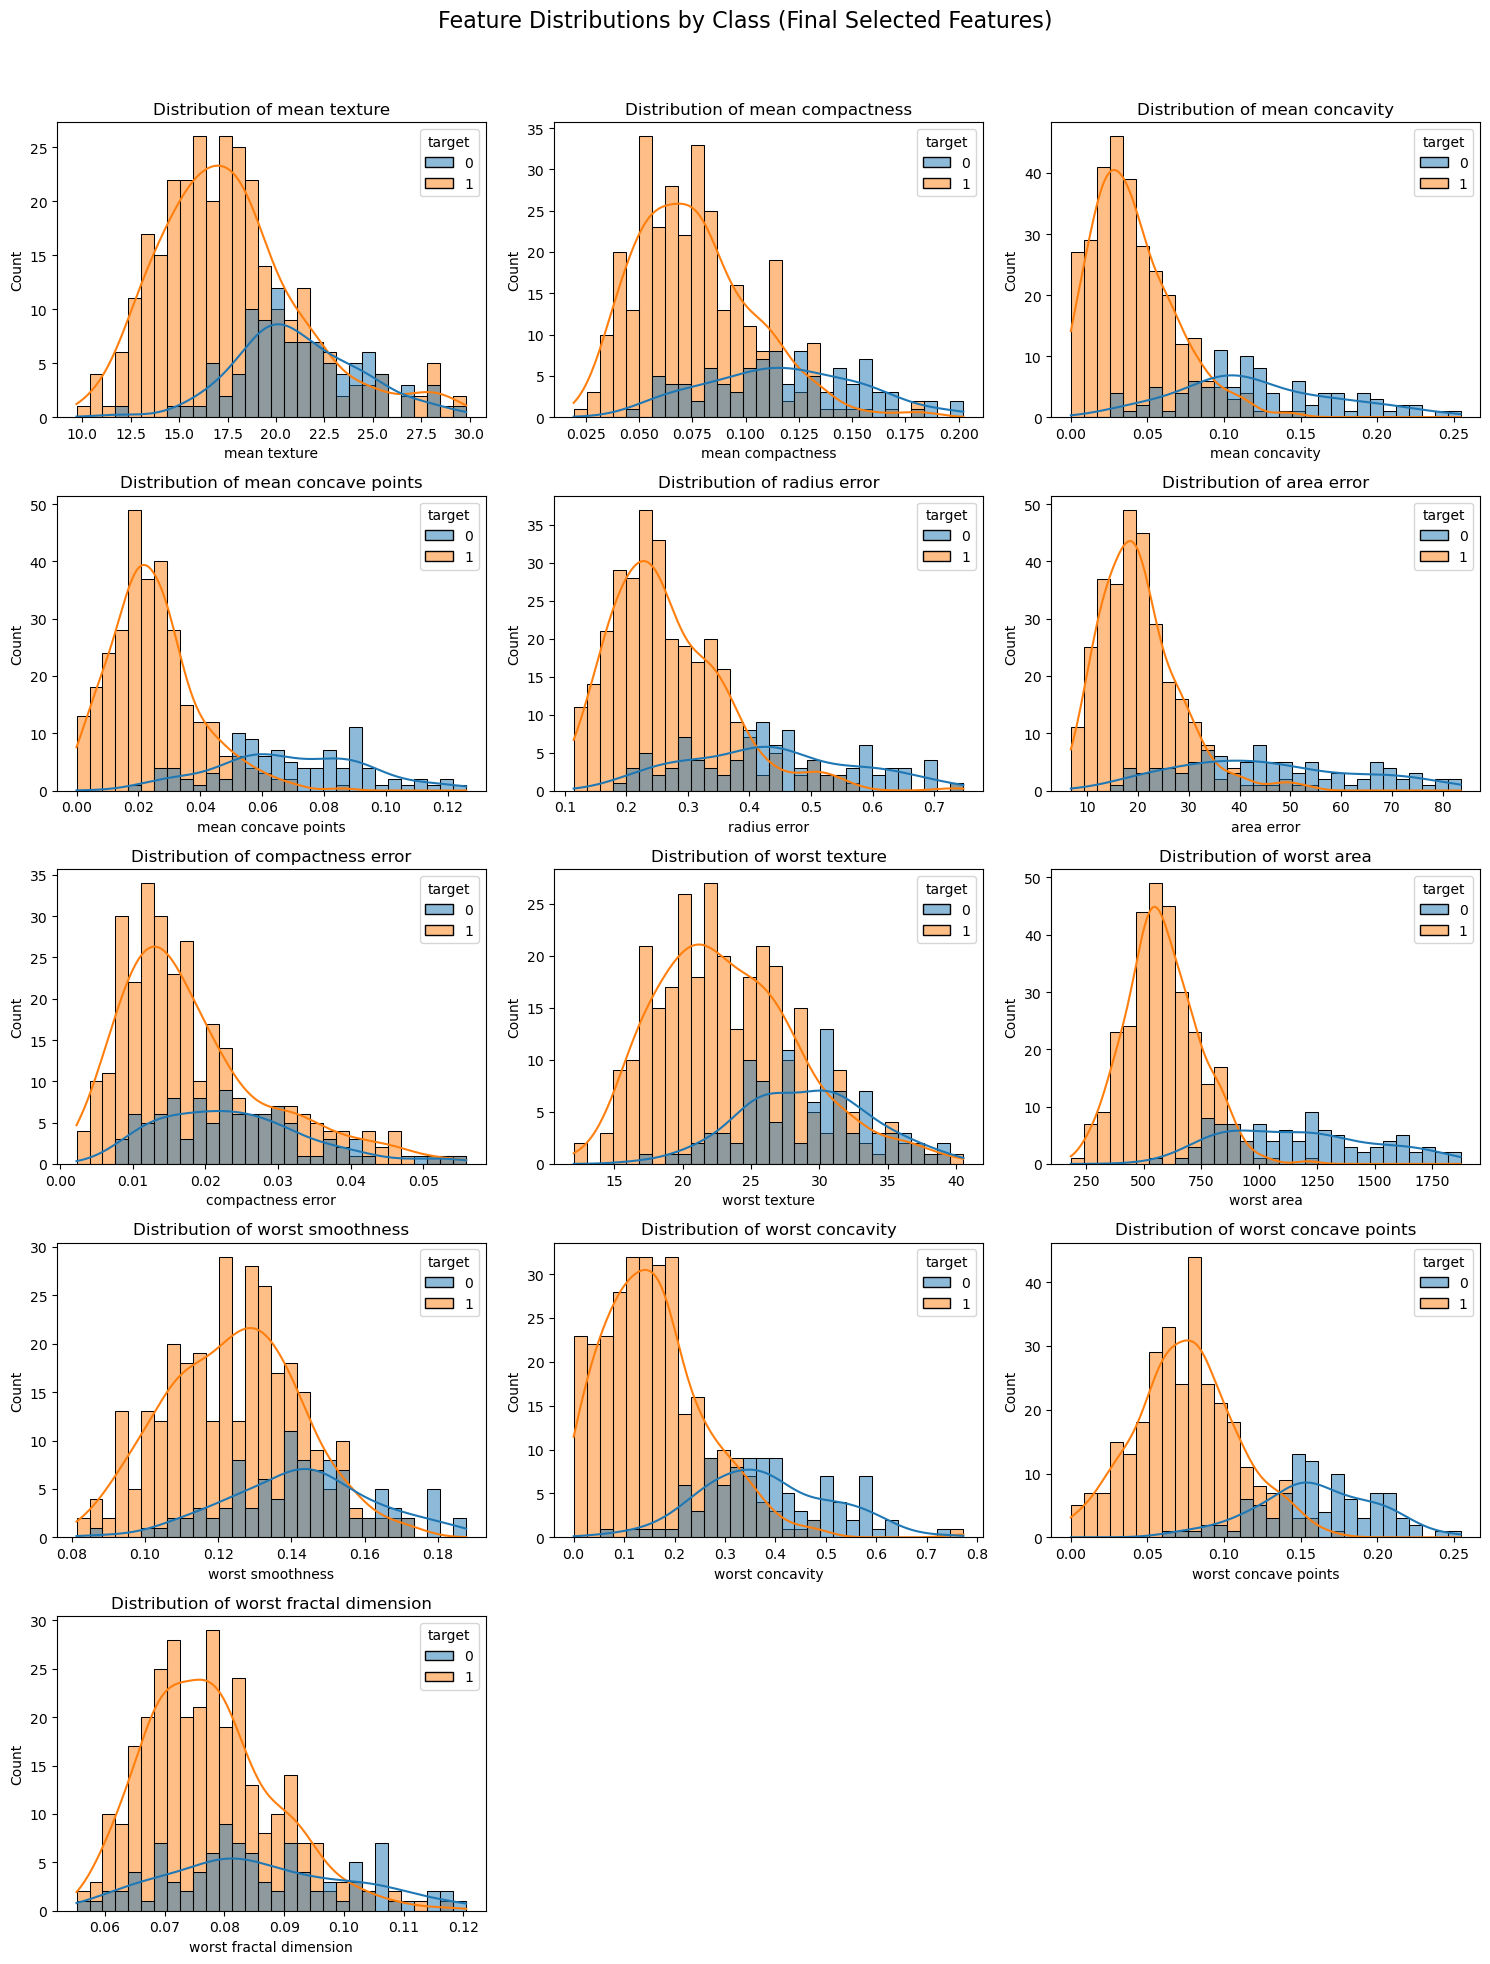

In [20]:
# Plot histograms for each selected feature

import math

# Get the number of selected features
num_features = len(df_final.columns) - 1  # Excluding target column

# Define grid size (rows, cols)
cols = 3  # Number of columns in grid
rows = math.ceil(num_features / cols)  # Number of rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))
fig.suptitle("Feature Distributions by Class (Final Selected Features)", fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each feature in a grid
for i, col in enumerate(df_final.columns[:-1]):  # Exclude target column
    sns.histplot(df_final, x=col, hue="target", kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for title
plt.show()


In [30]:
import numpy as np

# Compute covariance matrices
cov_0 = np.cov(df_final[df_final['target'] == 0].iloc[:, :-1], rowvar=False)
cov_1 = np.cov(df_final[df_final['target'] == 1].iloc[:, :-1], rowvar=False)

# Compare determinants
det_0 = np.linalg.det(cov_0)
print(det_0)
det_1 = np.linalg.det(cov_1)
print(det_1)

if abs(det_0 - det_1) > 1e-2:
    print("Covariance matrices differ significantly! Assumption may be violated.")
else:
    print("Covariance matrices are similar. Assumption holds.")


4.806004374581193e-24
5.3439344799457804e-27
Covariance matrices are similar. Assumption holds.


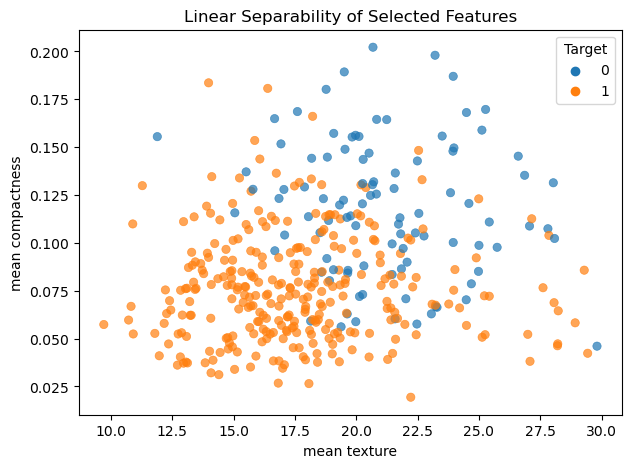

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 2 features from RFE results
feature1, feature2 = best_features[:2]  # Use the best 2 features selected in RFE

# Scatter plot
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df_final[feature1], y=df_final[feature2], hue=df_final['target'], alpha=0.7, edgecolor=None)
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("Linear Separability of Selected Features")
plt.legend(title="Target")
plt.show()


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Separate features and target
X = df_final.drop(columns=['target'])
y = df_final['target']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [24]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [25]:
# Apply LDA for classification
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [26]:
# Predict
y_pred = lda.predict(X_test)
print(y_pred)


[1 1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 1 1
 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0
 1 1 1 1 1 1]


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


# Compute performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9250
Precision: 0.9016
Recall: 1.0000

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.76      0.86        25
           1       0.90      1.00      0.95        55

    accuracy                           0.93        80
   macro avg       0.95      0.88      0.91        80
weighted avg       0.93      0.93      0.92        80



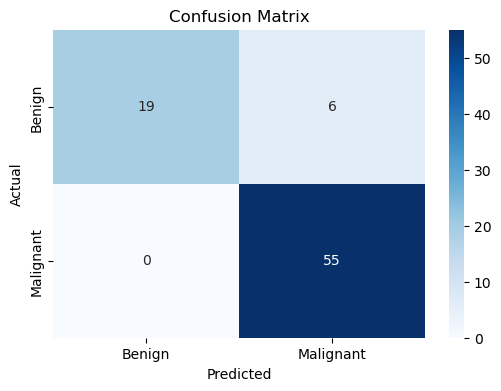

In [28]:
# Visualization: Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

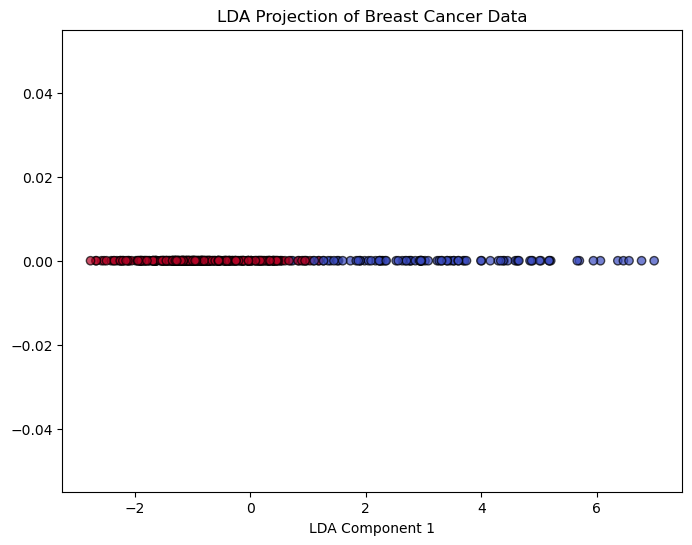

In [29]:
# Visualization: Decision boundary (for first two LDA components)
X_lda = lda.transform(X_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], np.zeros_like(X_lda[:, 0]), c=y, cmap="coolwarm", edgecolors="k", alpha=0.7)
plt.xlabel("LDA Component 1")
plt.title("LDA Projection of Breast Cancer Data")
plt.show()